In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy
from scipy.stats import randint
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report


import os
 
# Get the current directory
current_directory = os.getcwd()

# Traverse the current directory and its subdirectories
for dirname, _, filenames in os.walk(current_directory):
    for filename in filenames:
        print(os.path.join(dirname, filename))

c:\Users\ROHIT\Videos\SHARVARI DOC\ML PROJECT\dataset_phishing.csv
c:\Users\ROHIT\Videos\SHARVARI DOC\ML PROJECT\Machine Learning Mini Project.ipynb


In [2]:
# Load Dataset
data = pd.read_csv('dataset_phishing.csv')
# (11430, 89)
data.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate


In [3]:
# Pre-Processing
# dataset : web-page-phishing-detection-dataset
class_label_fieldname = 'status'
exclude_labels = ['url', class_label_fieldname]

y = data[class_label_fieldname]
X = data.drop(exclude_labels, axis=1)

In [4]:
RANDOM_SEED = 7
rfc = RandomForestClassifier(n_estimators=200, n_jobs=4, class_weight='balanced', random_state=RANDOM_SEED)
boruta = BorutaPy(estimator=rfc, n_estimators='auto', random_state=RANDOM_SEED, verbose=1)

In [5]:
# This prevents TypeError 
np.int = np.int32
np.float = np.float64
np.bool = np.bool_

boruta.fit(np.array(X),np.array(y))

Iteration: 1 / 100
Iteration: 2 / 100
Iteration: 3 / 100
Iteration: 4 / 100
Iteration: 5 / 100
Iteration: 6 / 100
Iteration: 7 / 100
Iteration: 8 / 100
Iteration: 9 / 100
Iteration: 10 / 100
Iteration: 11 / 100
Iteration: 12 / 100
Iteration: 13 / 100
Iteration: 14 / 100
Iteration: 15 / 100
Iteration: 16 / 100
Iteration: 17 / 100
Iteration: 18 / 100
Iteration: 19 / 100
Iteration: 20 / 100
Iteration: 21 / 100
Iteration: 22 / 100
Iteration: 23 / 100
Iteration: 24 / 100
Iteration: 25 / 100
Iteration: 26 / 100
Iteration: 27 / 100
Iteration: 28 / 100
Iteration: 29 / 100
Iteration: 30 / 100
Iteration: 31 / 100
Iteration: 32 / 100
Iteration: 33 / 100
Iteration: 34 / 100
Iteration: 35 / 100
Iteration: 36 / 100
Iteration: 37 / 100
Iteration: 38 / 100
Iteration: 39 / 100
Iteration: 40 / 100
Iteration: 41 / 100
Iteration: 42 / 100
Iteration: 43 / 100
Iteration: 44 / 100
Iteration: 45 / 100
Iteration: 46 / 100
Iteration: 47 / 100
Iteration: 48 / 100
Iteration: 49 / 100
Iteration: 50 / 100
Iteration

BorutaPy(estimator=RandomForestClassifier(class_weight='balanced',
                                          n_estimators=87, n_jobs=4,
                                          random_state=RandomState(MT19937) at 0x2337AC39040),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x2337AC39040, verbose=1)

In [6]:
# print support and ranking for each feature
print("\n------Support and Ranking for each feature------")
for i in range(len(boruta.support_)):
    if boruta.support_[i]:
        print("Passes the test: ", X.columns[i],
              " - Ranking: ", boruta.ranking_[i])
    else:
        print("Doesn't pass the test: ",
              X.columns[i], " - Ranking: ", boruta.ranking_[i])


------Support and Ranking for each feature------
Passes the test:  length_url  - Ranking:  1
Passes the test:  length_hostname  - Ranking:  1
Passes the test:  ip  - Ranking:  1
Passes the test:  nb_dots  - Ranking:  1
Passes the test:  nb_hyphens  - Ranking:  1
Doesn't pass the test:  nb_at  - Ranking:  26
Passes the test:  nb_qm  - Ranking:  1
Doesn't pass the test:  nb_and  - Ranking:  11
Doesn't pass the test:  nb_or  - Ranking:  48
Passes the test:  nb_eq  - Ranking:  1
Doesn't pass the test:  nb_underscore  - Ranking:  10
Doesn't pass the test:  nb_tilde  - Ranking:  35
Doesn't pass the test:  nb_percent  - Ranking:  16
Passes the test:  nb_slash  - Ranking:  1
Doesn't pass the test:  nb_star  - Ranking:  45
Doesn't pass the test:  nb_colon  - Ranking:  24
Doesn't pass the test:  nb_comma  - Ranking:  39
Doesn't pass the test:  nb_semicolumn  - Ranking:  28
Doesn't pass the test:  nb_dollar  - Ranking:  43
Doesn't pass the test:  nb_space  - Ranking:  17
Passes the test:  nb_www

In [7]:
# check selected features - first 5 features are selected
boruta.support_
# check ranking of features
boruta.ranking_
print("No. of significant features: ", boruta.n_features_) 
# Display feature selection results in table
selected_rf_features = pd.DataFrame({'Feature':list(X.columns),'Ranking':boruta.ranking_})
selected_rf_features.sort_values(by='Ranking') 

# call transform() on X to filter it down to selected features
X_filtered = boruta.transform(np.array(X))
# print(X_filtered.shape)


No. of significant features:  37


**FEATURE EXTRACTION COMPLETE**

**TRAINING THE RANDOM FOREST CLASSIFIER**

In [ ]:
# split dataset
RANDOM_SEED = 9
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y, test_size=0.2, random_state=RANDOM_SEED)

In [ ]:
# Hyperparameter Tuning
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}
# Use random search to find the best hyperparameters
# 5-Fold Cross-Validation
# Sample 10 (n_iter) random hyperparameter settings
rand_search = RandomizedSearchCV(rfc, 
                                 param_distributions = param_dist, 
                                 n_iter=10, 
                                 cv=5,
                                 n_jobs=4,
                                 verbose=4,
                                 random_state=RANDOM_SEED
                                )

# Hyperparameter Tuning
rand_search.fit(X_train, y_train)

# Create a variable for the best model
best_rfc = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best hyperparameters: {'max_depth': 18, 'n_estimators': 298}


In [ ]:
# compute predictions
y_pred = best_rfc.predict(X_test)

Accuracy: 0.9584426946631671
Confusion Matrix:
[[1109   39]
 [  56 1082]]


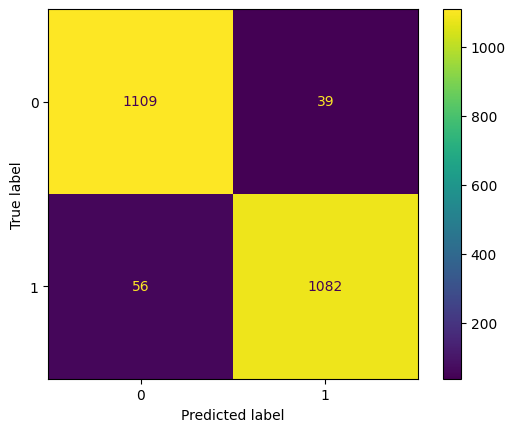

In [ ]:
# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

ConfusionMatrixDisplay(confusion_matrix=confusion_mat).plot();

In [ ]:
# Generate the classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

  legitimate       0.95      0.97      0.96      1148
    phishing       0.97      0.95      0.96      1138

    accuracy                           0.96      2286
   macro avg       0.96      0.96      0.96      2286
weighted avg       0.96      0.96      0.96      2286



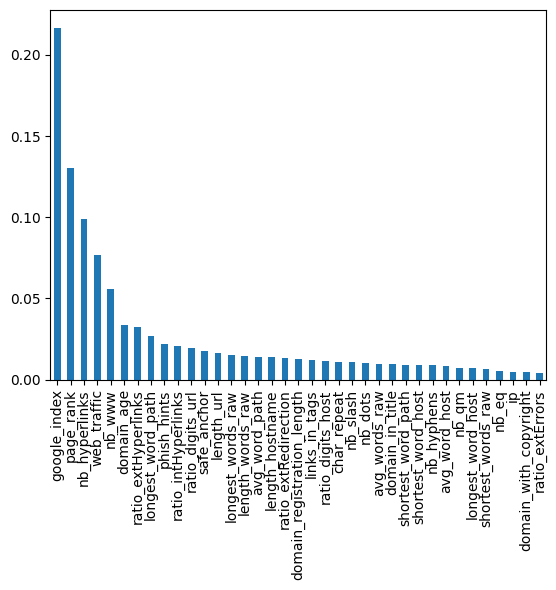

In [ ]:
_columns = []
for i in range(len(boruta.support_)):
    if boruta.support_[i]:
        _columns.append(X.columns[i])
        
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(best_rfc.feature_importances_, index=_columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar();